### Etude des variables dans la catégorie solvabilité

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

data = pd.read_csv("data.csv")
data.columns.tolist()
# Supprimer les espaces en trop autour des noms de colonnes
data.columns = data.columns.str.strip()

In [18]:
structure = [
    "Interest-bearing debt interest rate",
    "Interest Expense Ratio",
    "Total debt/Total net worth",
    "Debt ratio %",
    "Net worth/Assets",
    "Long-term fund suitability ratio (A)",
    "Borrowing dependency",
    "Contingent liabilities/Net worth",
    "Liability-Assets Flag",
    "Liability to Equity",
    "Degree of Financial Leverage (DFL)",
    "Interest Coverage Ratio (Interest expense to EBIT)",
    "Equity to Liability"
]



data_solv = data[[col for col in data.columns if col in structure]]
len(structure)

13

<Axes: >

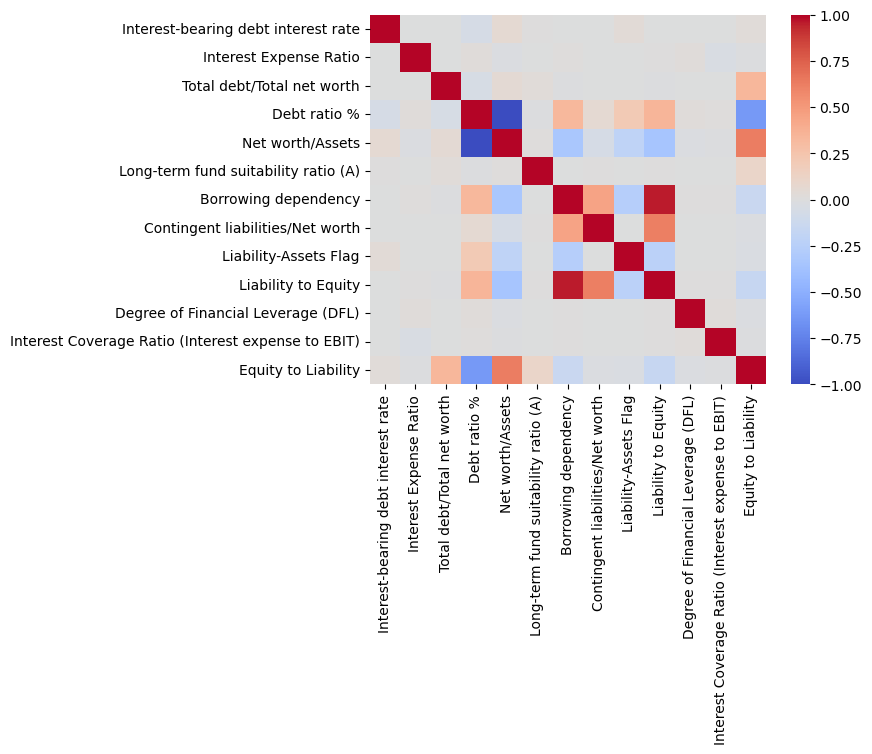

In [19]:
corr = data_solv.corr()
sns.heatmap(corr, cmap='coolwarm')

5.345068783480021


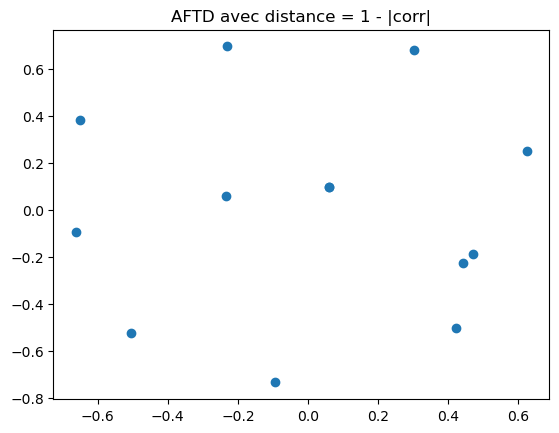

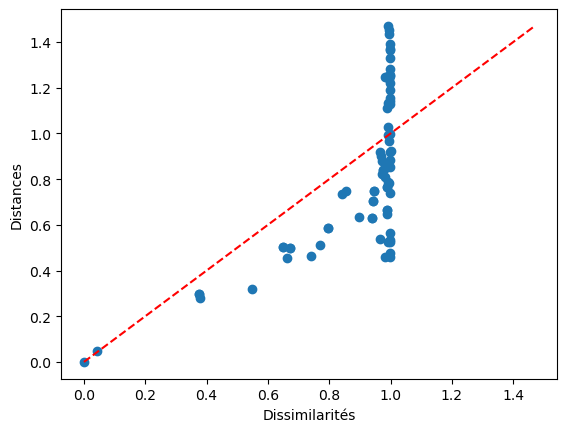

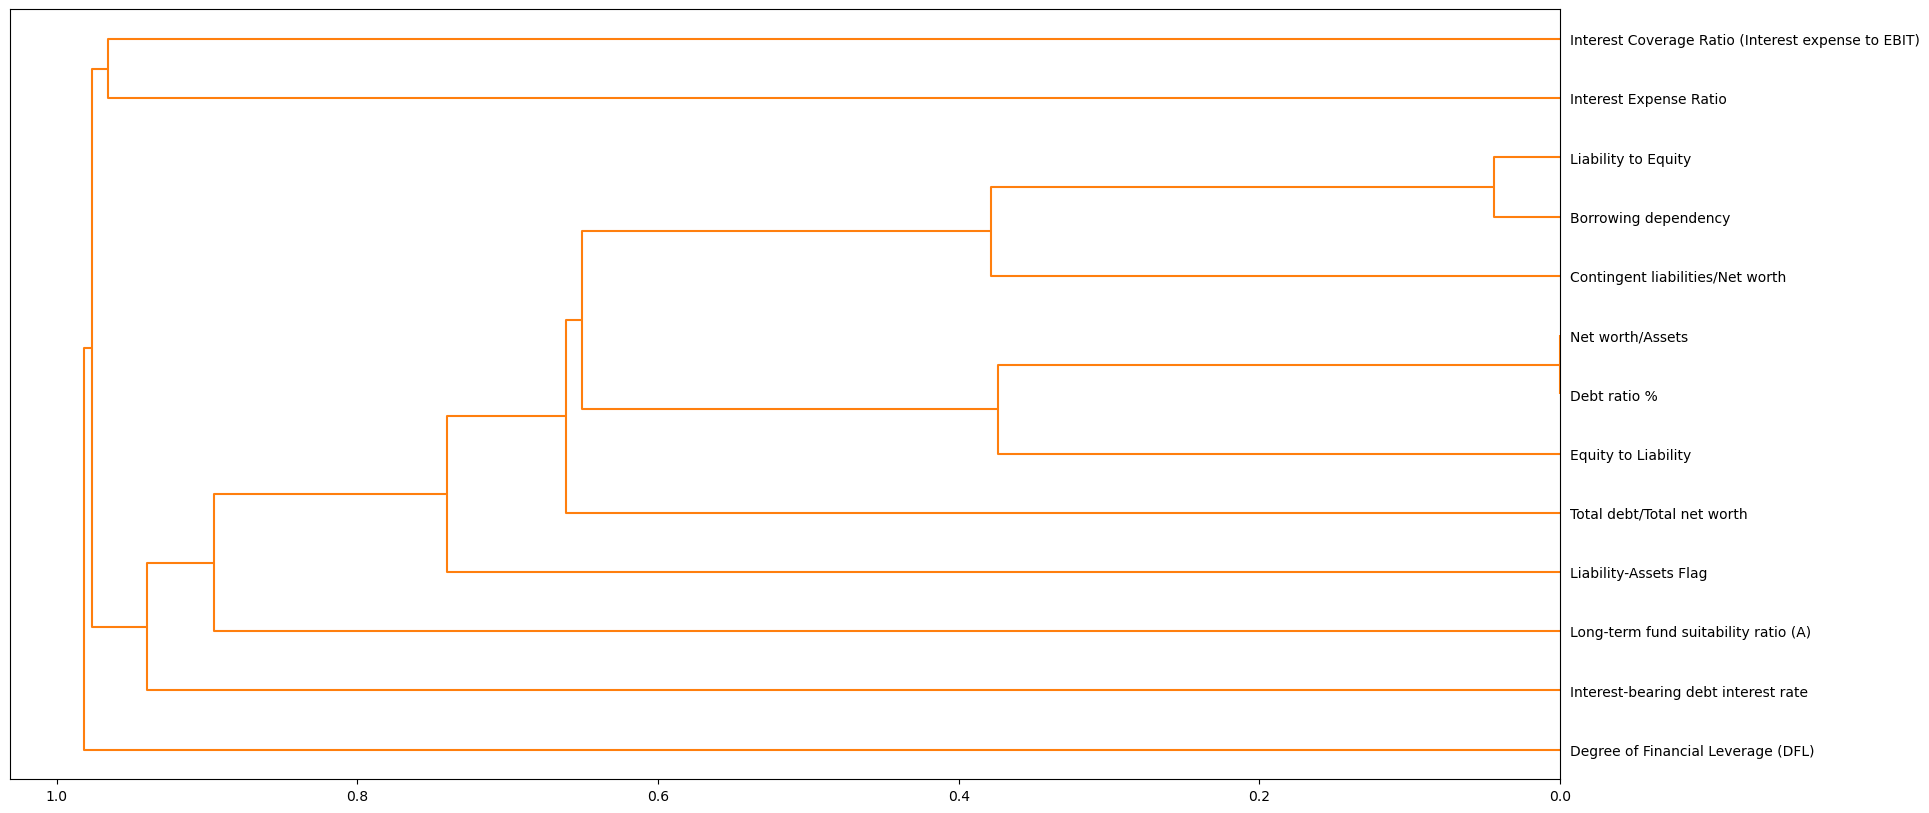

In [20]:
from sklearn.manifold import MDS
from src1.utils import plot_Shepard
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Méthode 1 : distance = 1 - |corrélation|
distance1 = 1-abs(corr)


aftd = MDS(n_components=2, dissimilarity='precomputed')
dist1 = aftd.fit_transform(distance1)
print(aftd.stress_)
plt.scatter(*dist1.T)
plt.title("AFTD avec distance = 1 - |corr|")
plt.show()
plot_Shepard(aftd)
plt.show()

cls = AgglomerativeClustering(metric="precomputed", linkage="single", n_clusters=None, distance_threshold=0).fit(distance1)
plt.figure(figsize=(20, 10))
plot_dendrogram(cls, color_threshold=1, labels=corr.columns, orientation="left")

In [21]:
data_solv['Bankrupt'] = data['Bankrupt?'].values
data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values

C:\Users\arthu\AppData\Local\Temp\ipykernel_10960\3523034060.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Bankrupt'] = data['Bankrupt?'].values
C:\Users\arthu\AppData\Local\Temp\ipykernel_10960\3523034060.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_solv['Liability-Assets Flag']=data['Liability-Assets Flag'].values


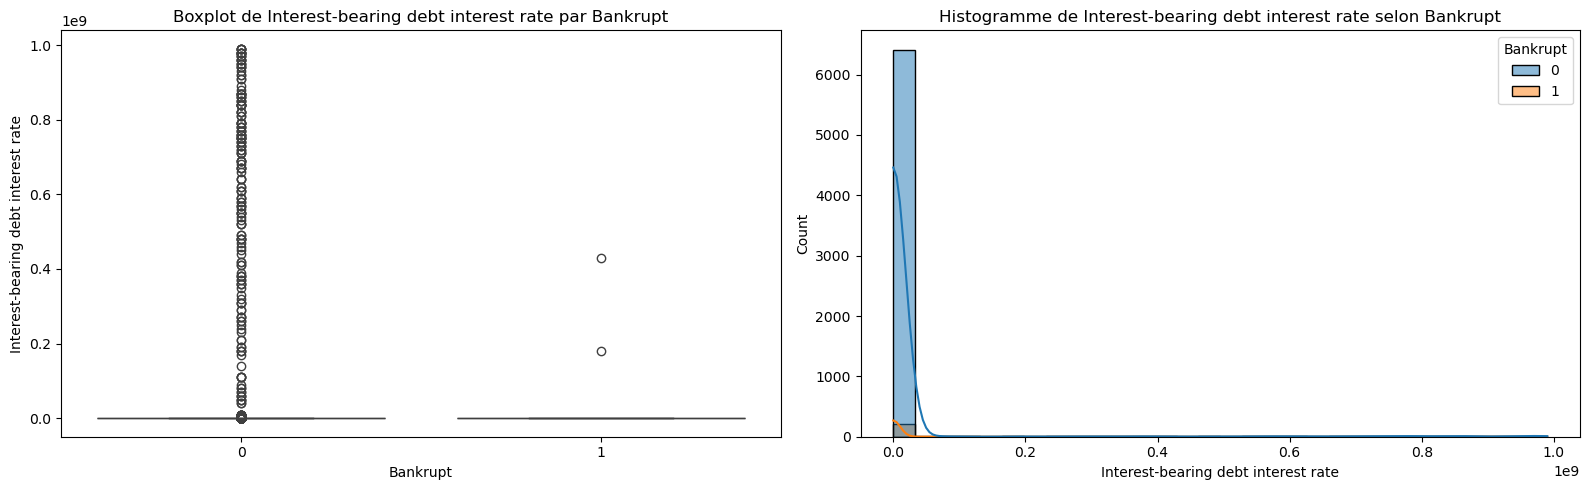

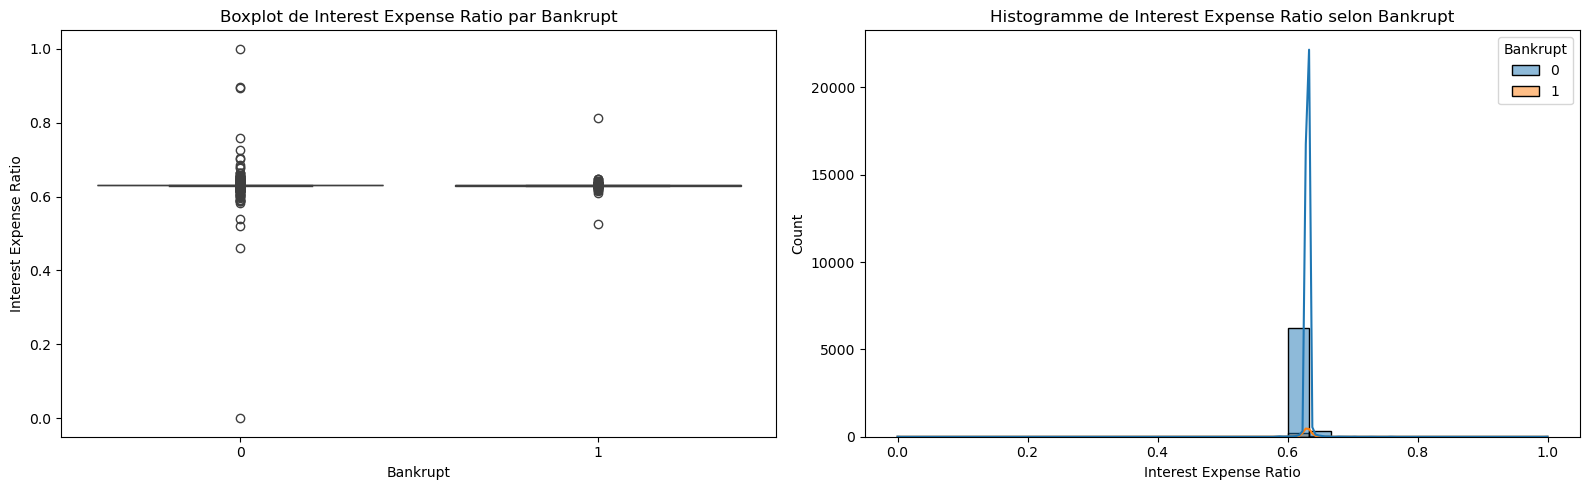

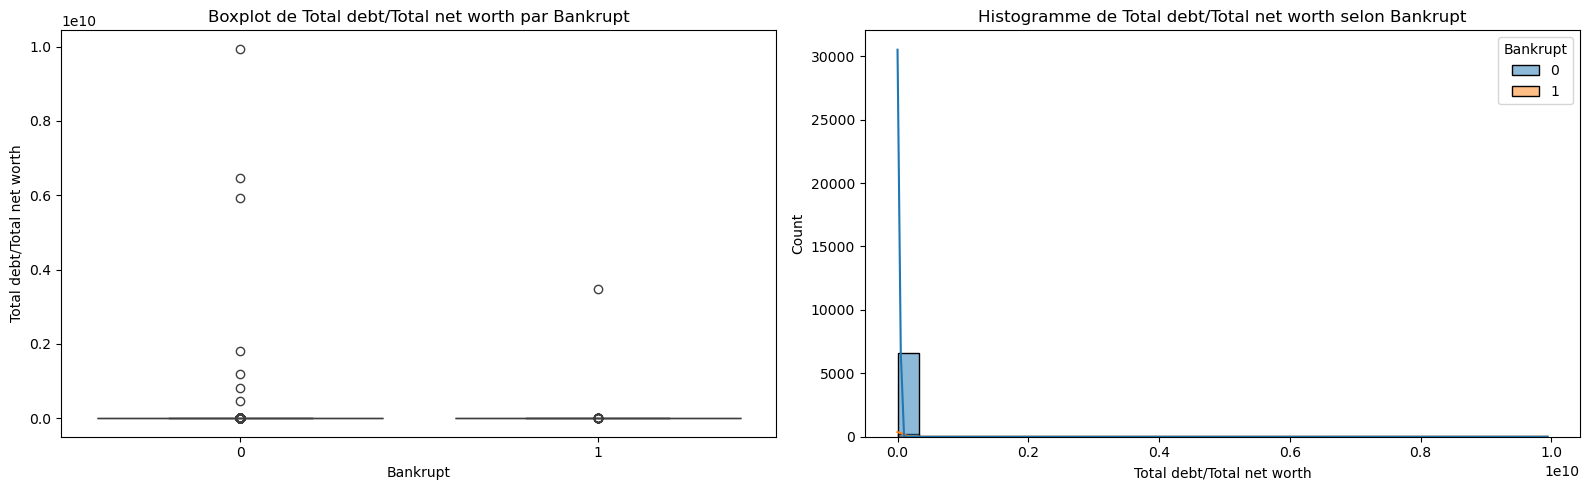

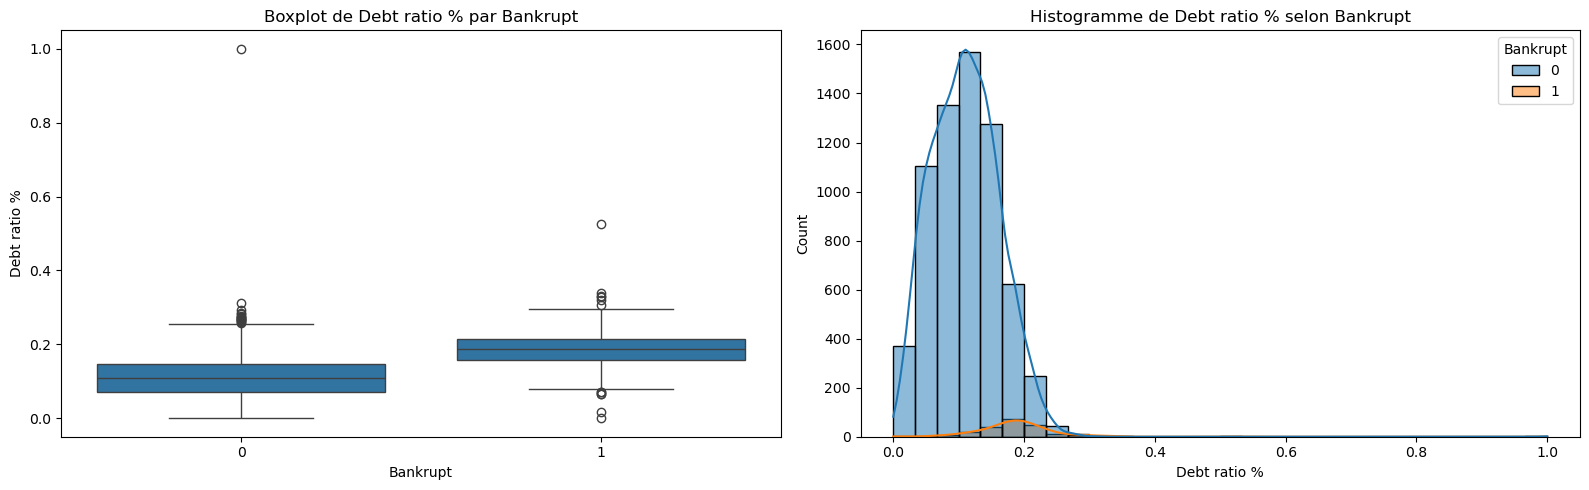

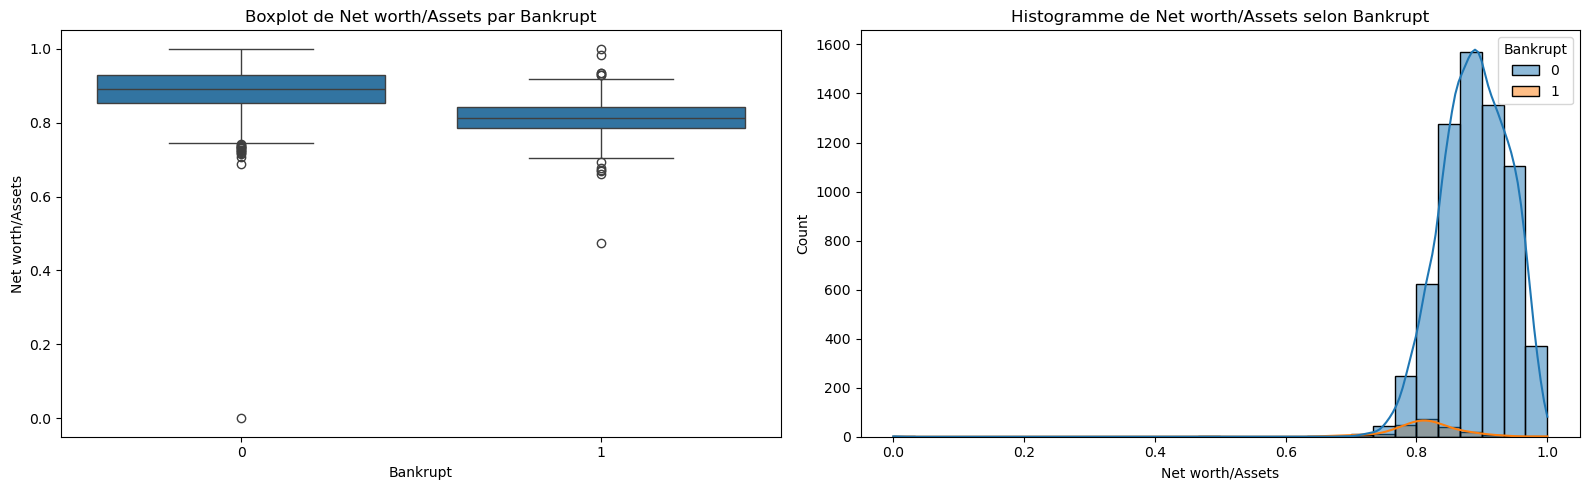

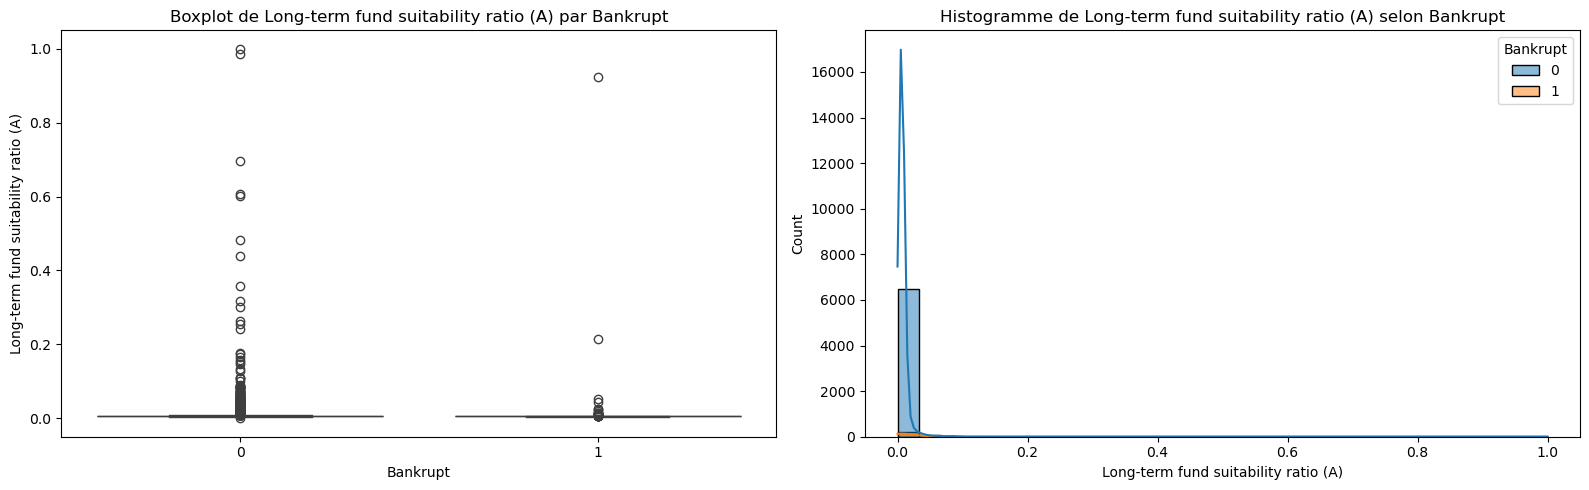

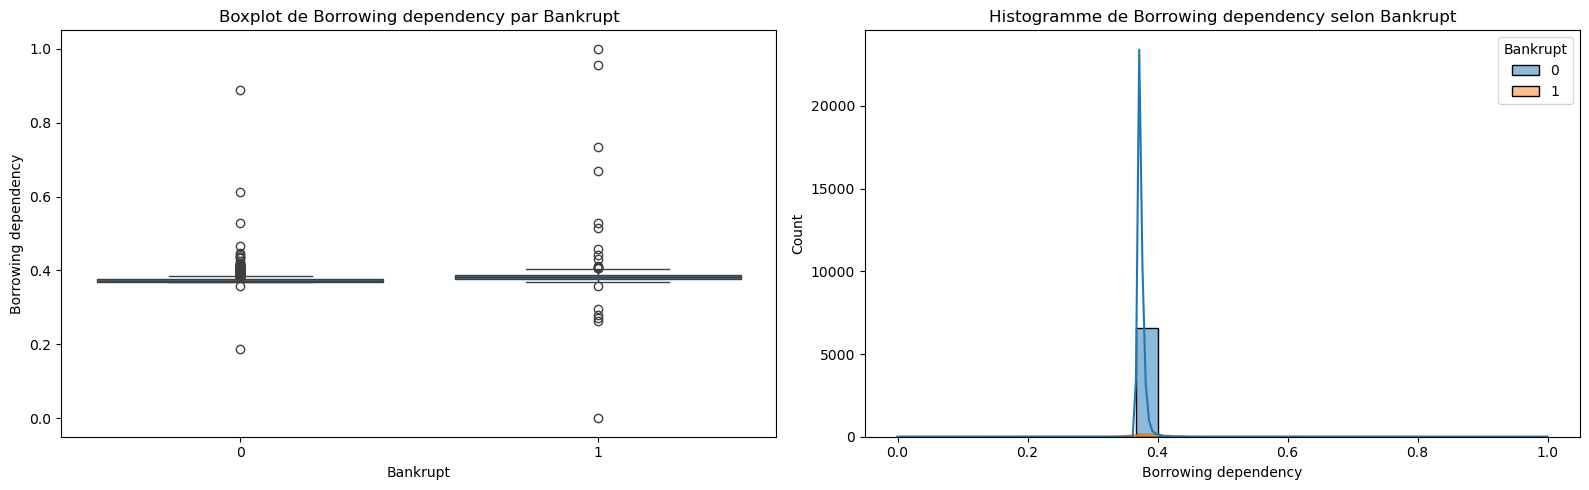

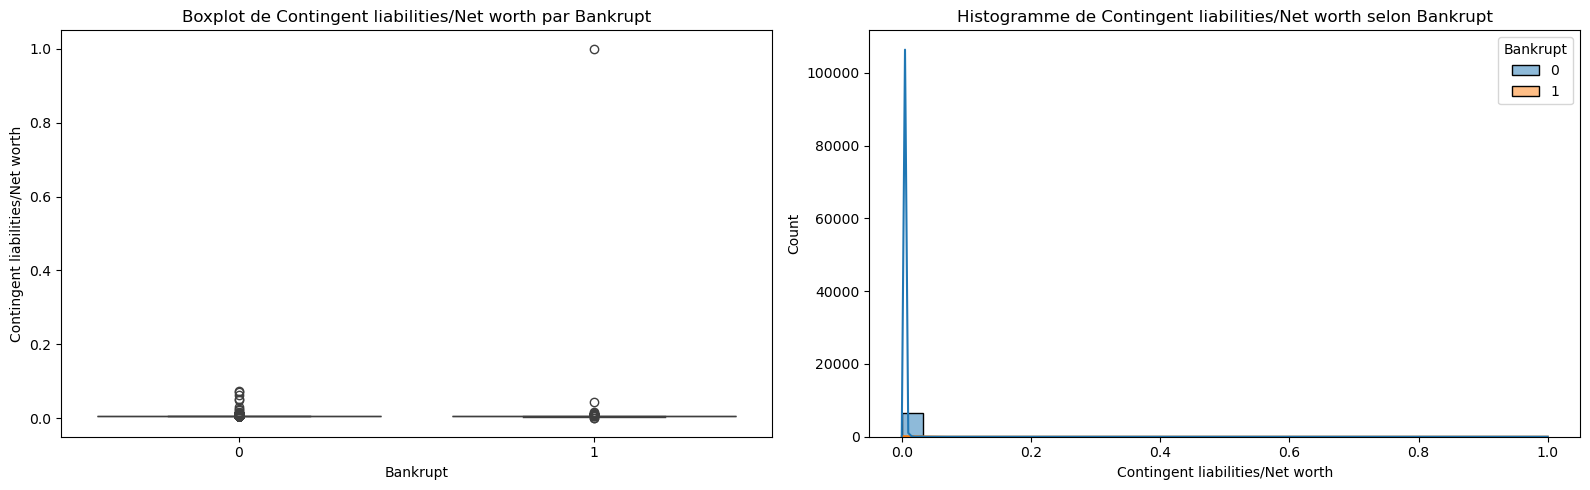

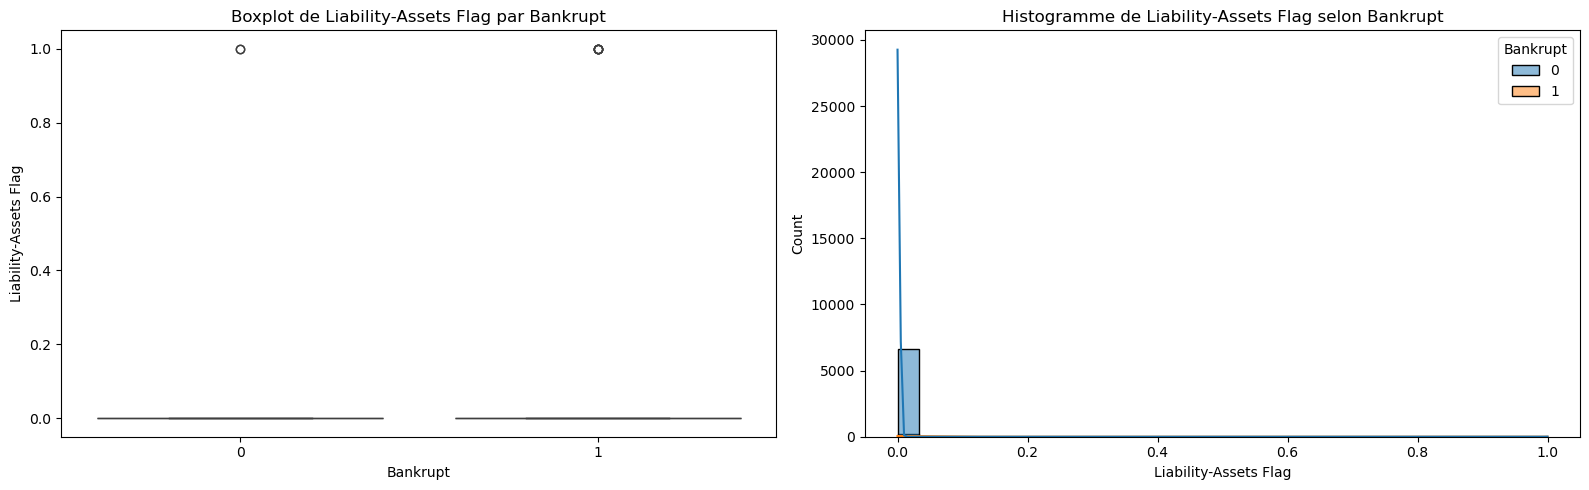

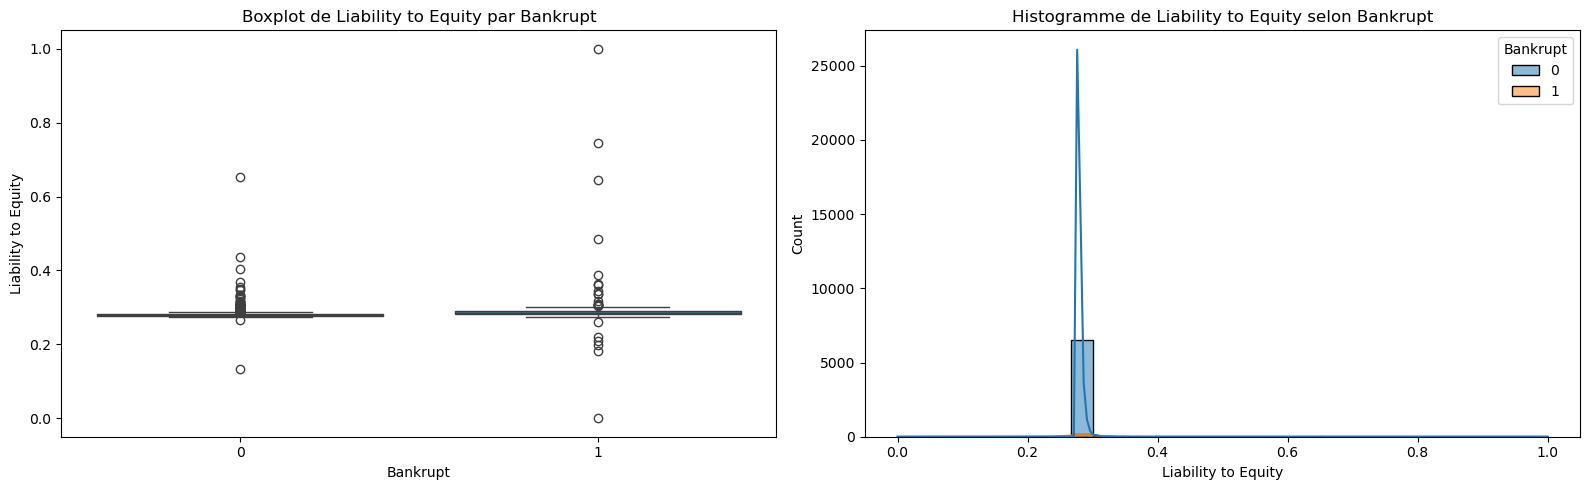

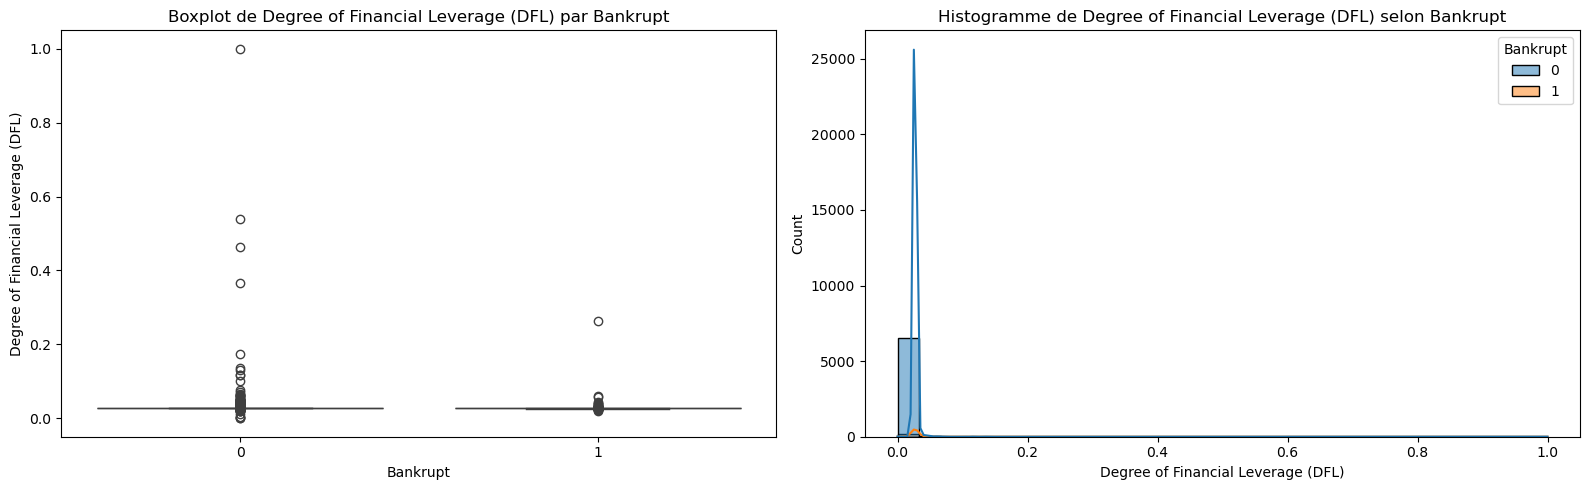

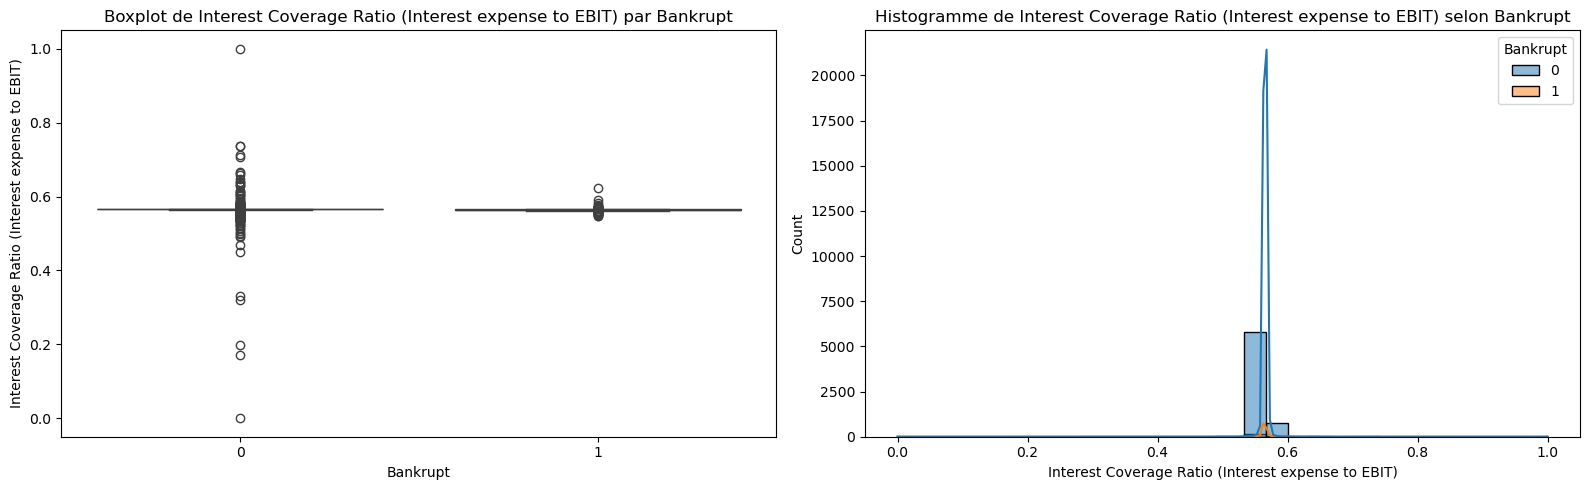

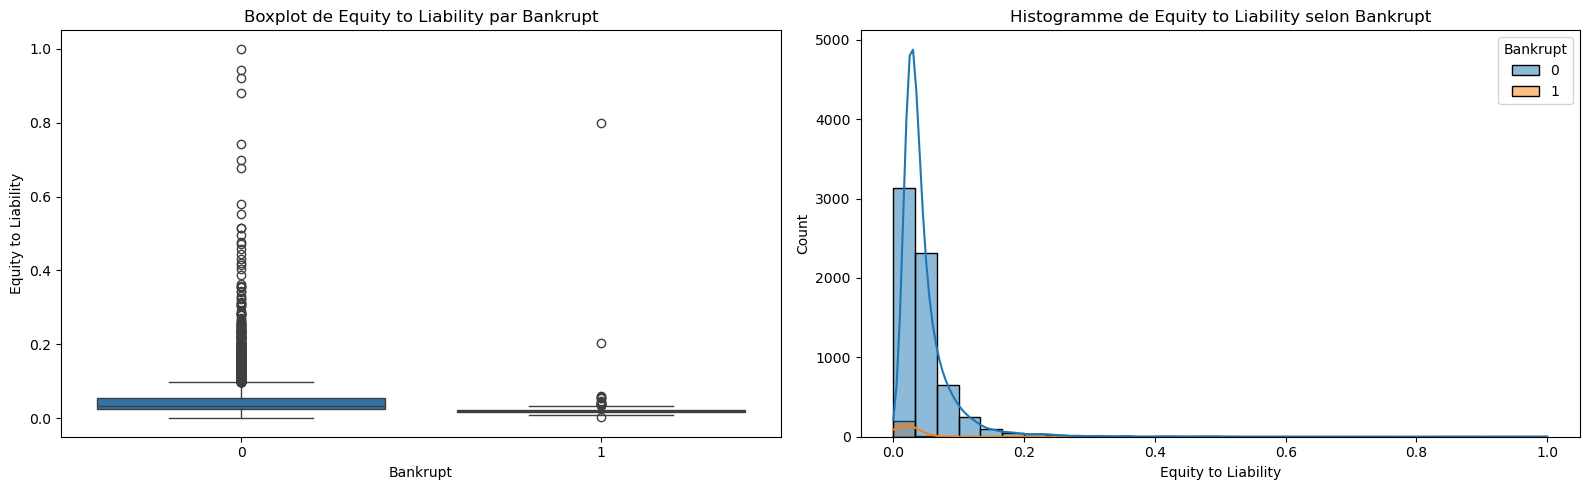

In [22]:
for col in structure:
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

    # Boxplot
    sns.boxplot(x='Bankrupt', y=col, data=data_solv, ax=axes[0])
    axes[0].set_title(f'Boxplot de {col} par Bankrupt')

    # Histogramme
    sns.histplot(data=data_solv, x=col, hue='Bankrupt', kde=True, bins=30, ax=axes[1])
    axes[1].set_title(f'Histogramme de {col} selon Bankrupt')

    plt.tight_layout()
    plt.show()


Assimétrie entre entreprises en faillite ou non (asser faible) : 
- "Debt ratio %",
- "Net worth/Assets", 

### CAH sur les entreprises

In [23]:
data_quant = data[[col for col in data.columns if col in structure]]

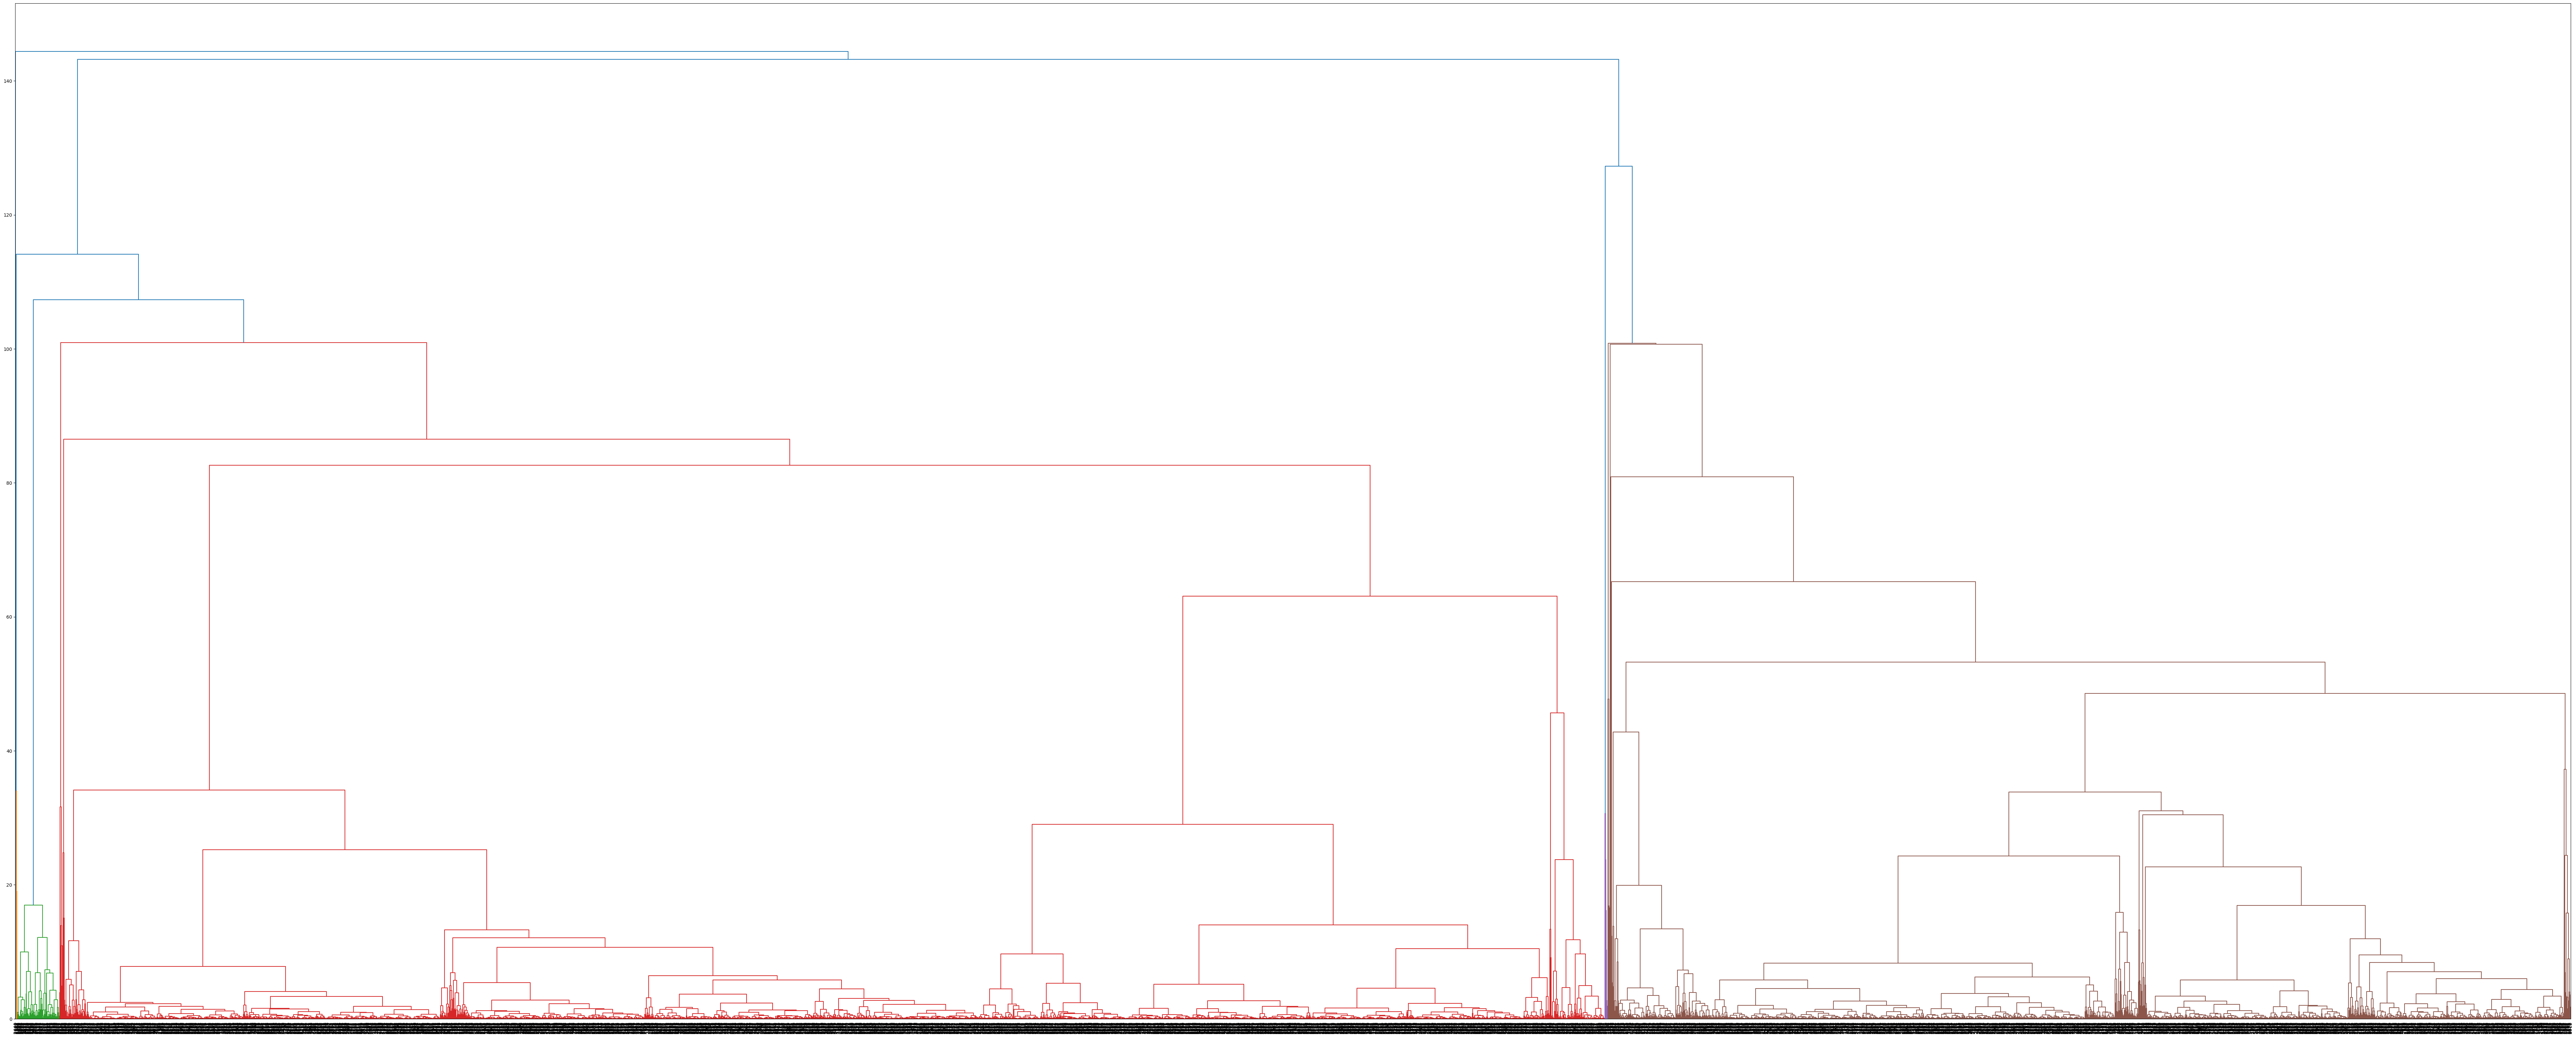

In [24]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from src1.utils import plot_dendrogram

# Normalisation des variables numériques
norm = StandardScaler()
quantiative_norm = norm.fit_transform(data_quant)

cls = AgglomerativeClustering(metric="euclidean", linkage="ward", distance_threshold=0, n_clusters=None)
cls.fit(quantiative_norm)
plt.figure(figsize=(100, 40))
plot_dendrogram(cls)

On remarque 3 ou 4 clusters

### AFTD sur les entreprises

In [14]:
# Prend trop de temps
#aftd = MDS(n_components=2, dissimilarity='euclidean')
#dist = aftd.fit_transform(quantiative_norm)
#print(aftd.stress_)
#plt.scatter(*dist.T)
#plt.show()

In [ ]:
#plot_Shepard(aftd)
#plt.show()

### ACP

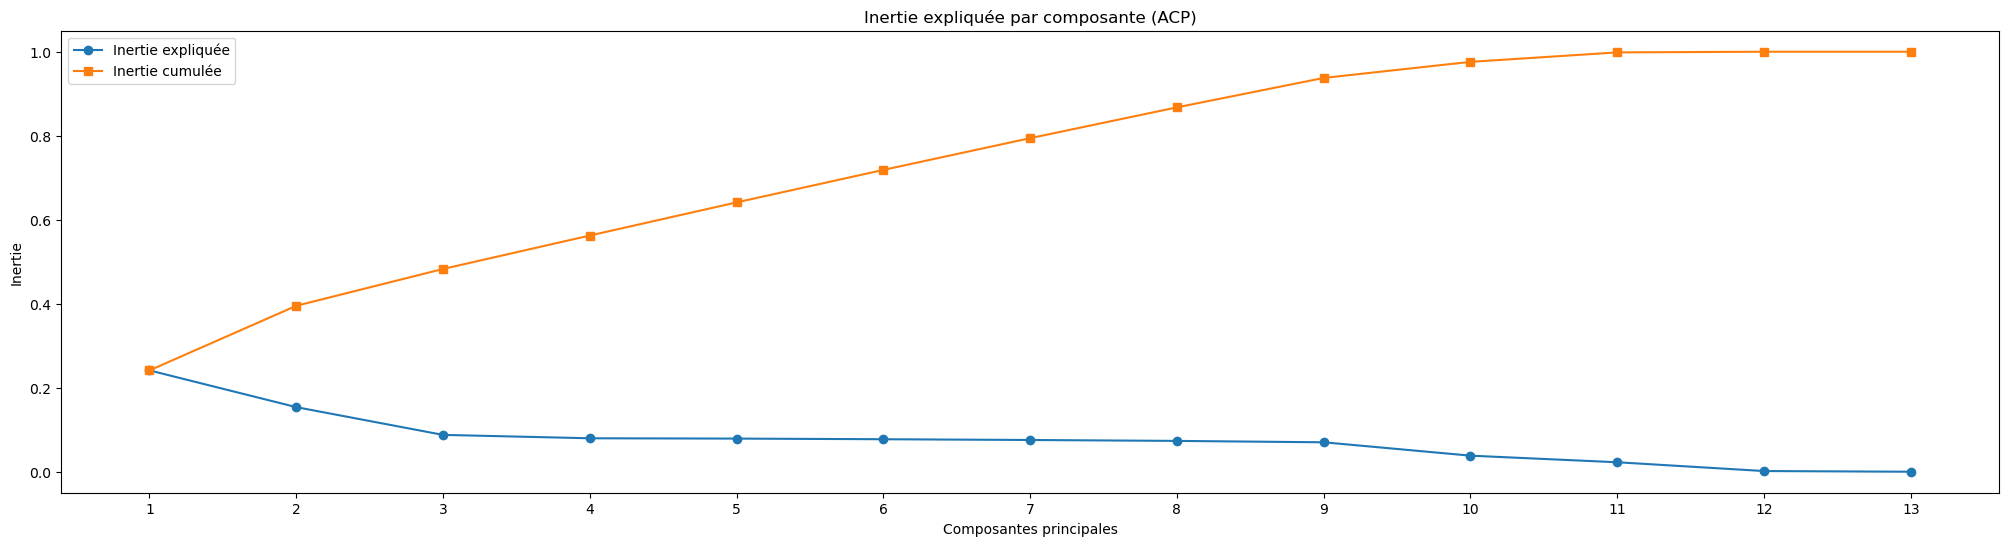

In [25]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

cls = PCA()
pcs = cls.fit_transform(quantiative_norm)

# Inertie expliquée et cumulée
inertie_exp = cls.explained_variance_ratio_
cumul_inertie = inertie_exp.cumsum()

plt.figure(figsize=(25, 6))
plt.plot(range(1, len(inertie_exp) + 1), inertie_exp, marker='o', label="Inertie expliquée")
plt.plot(range(1, len(cumul_inertie) + 1), cumul_inertie, marker='s', label="Inertie cumulée")
plt.xticks(range(1, len(inertie_exp) + 1))
plt.xlabel("Composantes principales")
plt.ylabel("Inertie")
plt.title("Inertie expliquée par composante (ACP)")
plt.legend()

<Axes: xlabel='PC1', ylabel='PC2'>

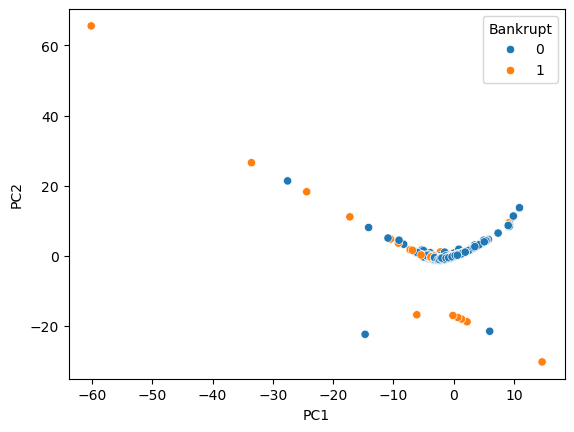

In [126]:
data_acp = pd.DataFrame(pcs, columns=[f"PC{i}" for i in range(1, len(inertie_exp)+1)])
data_acp['Bankrupt'] = data['Bankrupt?'].values
data_acp['Liability-Assets Flag']=data['Liability-Assets Flag'].values

sns.scatterplot(x="PC1", y="PC2", hue=data_acp.Bankrupt, data=data_acp)

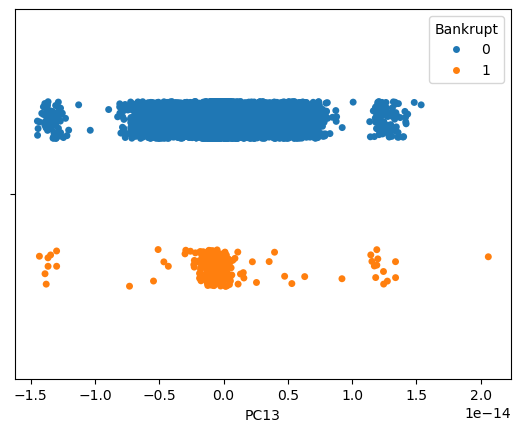

In [135]:
ax = sns.stripplot(x=data_acp["PC13"], hue=data_acp.Bankrupt, dodge=True)

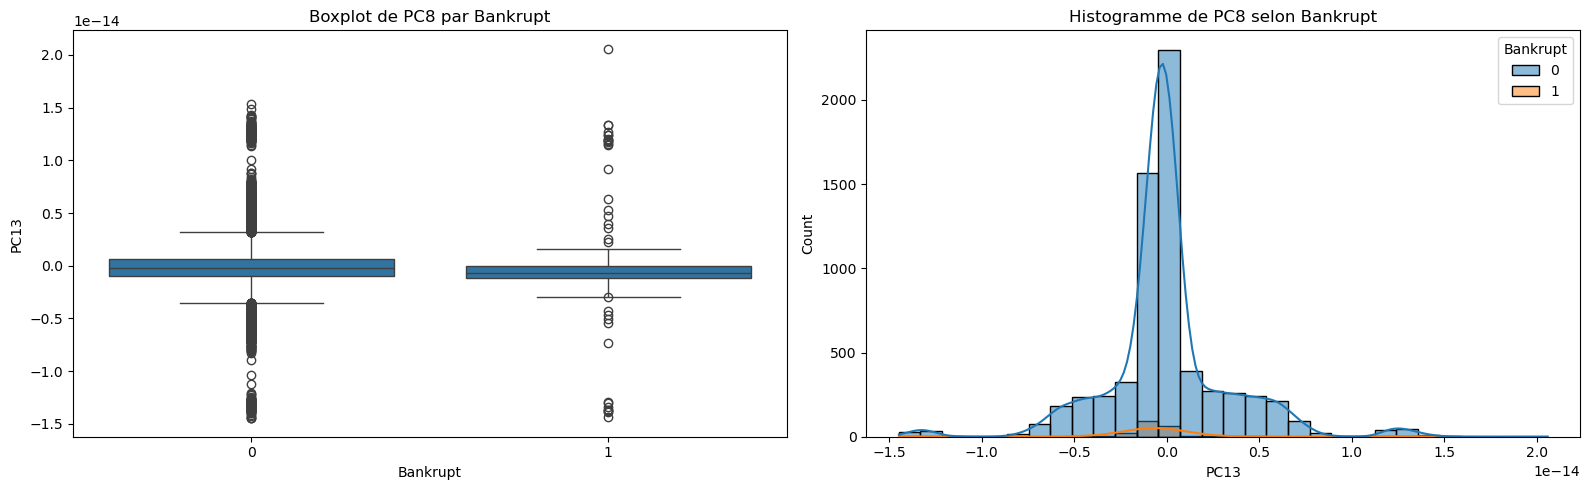

In [132]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 5))

# Boxplot
sns.boxplot(x='Bankrupt', y='PC13', data=data_acp, ax=axes[0])
axes[0].set_title(f'Boxplot de PC8 par Bankrupt')

# Histogramme
sns.histplot(data=data_acp, x='PC13', hue='Bankrupt', kde=True, bins=30, ax=axes[1])
axes[1].set_title(f'Histogramme de PC8 selon Bankrupt')

plt.tight_layout()
plt.show()

In [136]:
# Matrice des composantes principales
components = cls.components_ 
components[12]

array([ 2.65257664e-17,  1.28540847e-16,  3.23714555e-16,  7.07106781e-01,
        7.07106781e-01, -1.33363430e-16, -1.95103054e-15, -5.70172967e-16,
        1.44473726e-16,  2.67558847e-15,  3.58946028e-17, -1.41734530e-16,
       -3.77020548e-16])

### PC13 intéréssante